# REGRESIÓN LINEAL MÚLTIPLE - PECES

En este caso quiero realizar una relación lineal múltiple. Sustancialmente, tiene la misma filosofia que la regresión lineal múltiple, solo que añade más variables explicativas al modelo. Para ello, vamos a intentar inferir el peso de unos peces utilizando distintas longitudes de su anatomia. La base de datos empleada se encuentra alojada en Kaggle (https://www.kaggle.com/datasets/aungpyaeap/fish-market).

### Importamos las librerias

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado de datos y modelado 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Carga y limpieza de la base de datos

In [2]:
# Cargamos la base de datos como un dataframe
df_peces = pd.read_csv ("Fish.csv")

In [3]:
# Visualizamos las primeras lineas del data-frame y castellanizamos las columnas
# df_peces.head()

Castellanizacion = {"Species":"Especie","Weight":"Peso","Length1":"Longitud1","Length2":"Longitud2","Length3":"Longitud3","Height":"Altura","Width":"Ancho"}
df_peces.rename (columns=Castellanizacion, inplace= True)

df_peces.head()

,Especie,Peso,Longitud1,Longitud2,Longitud3,Altura,Ancho
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
# Visualiamos la descripción estadística de los datos
df_peces.describe()

,Peso,Longitud1,Longitud2,Longitud3,Altura,Ancho
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Obervando los datos, vemos que al menos uno de los peces tiene un peso de 0 g. Esto no es posible, por lo tanto debemos asumir que es un error en el registro de los datos. Además, es un error a nuestra variable dependiente; en otra palabras, estaríamos intentando explicar un dato que no puede ser. Por lo tanto, vamos a eliminar este dato de la base de datos.

También me gustaría visualizar la distribución de los datos que vamos a emplear.

Text(0.5, 1.0, 'Ancho (cm)')

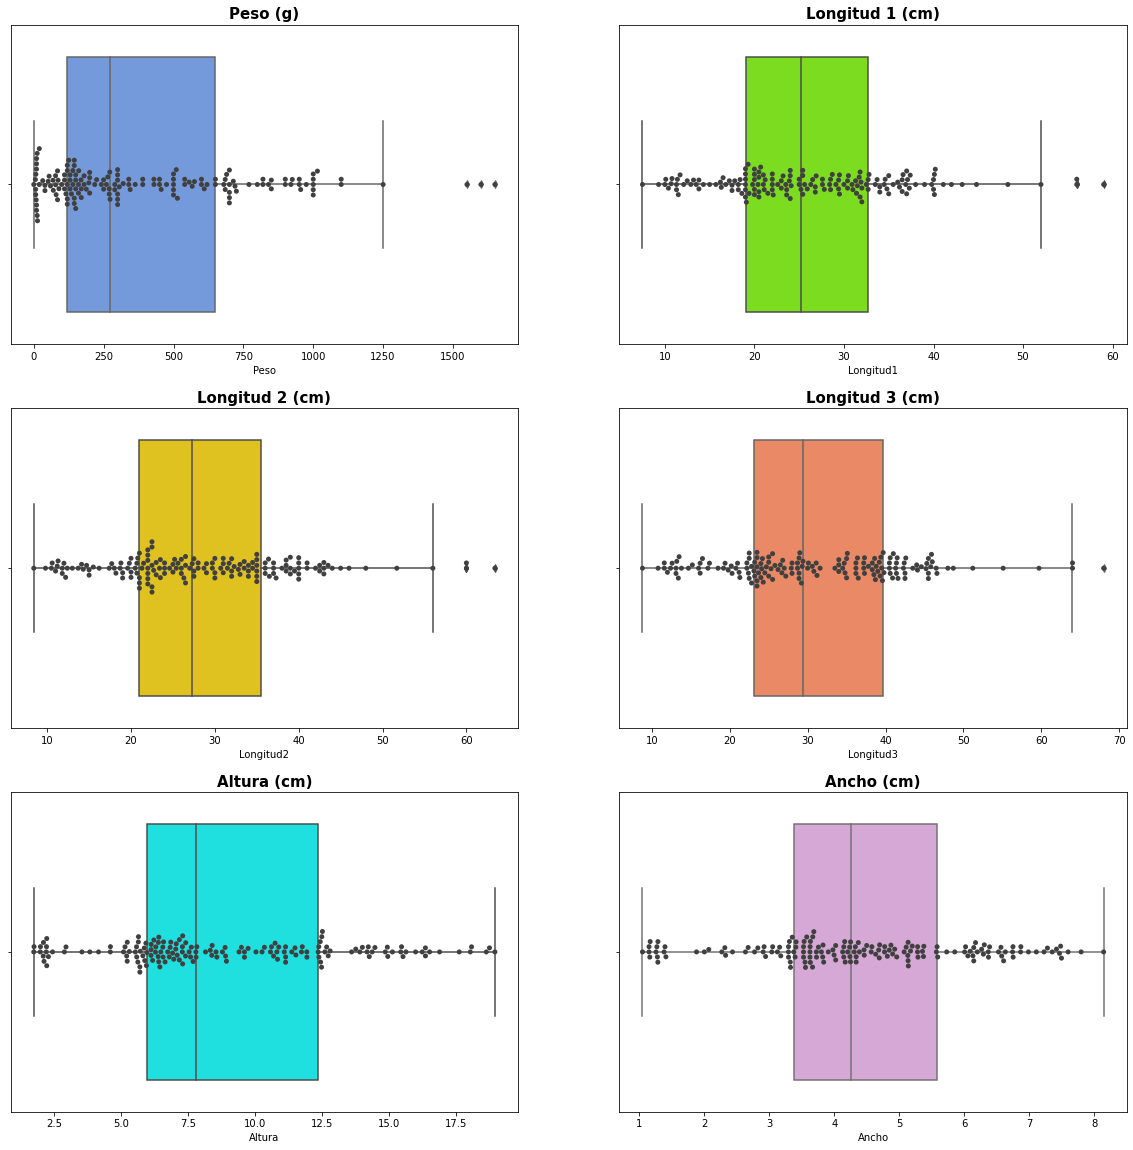

In [5]:
fig, axs =plt.subplots(nrows=3, ncols=2, figsize=(20,20))

# Grafica para el peso
sns.boxplot(x="Peso", data=df_peces, ax = axs[0,0], color="cornflowerblue")
sns.swarmplot(x="Peso", data=df_peces, color=".25", ax = axs[0,0])
axs[0,0].set_title('Peso (g)', fontsize = 15, fontweight = "bold")

# Grafica para la longitud 1
sns.boxplot(x="Longitud1", data=df_peces, ax = axs[0,1], color="lawngreen")
sns.swarmplot(x="Longitud1", data=df_peces, color=".25", ax = axs[0,1])
axs[0,1].set_title('Longitud 1 (cm)', fontsize = 15, fontweight = "bold")

# Grafica para la longitud 1
sns.boxplot(x="Longitud2", data=df_peces, ax = axs[1,0], color="gold")
sns.swarmplot(x="Longitud2", data=df_peces, color=".25", ax = axs[1,0])
axs[1,0].set_title('Longitud 2 (cm)', fontsize = 15, fontweight = "bold")

# Grafica para la longitud 
sns.boxplot(x="Longitud3", data=df_peces, ax = axs[1,1],  color="coral")
sns.swarmplot(x="Longitud3", data=df_peces, color=".25", ax = axs[1,1])
axs[1,1].set_title('Longitud 3 (cm)', fontsize = 15, fontweight = "bold")

# Grafica para la altura
sns.boxplot(x="Altura", data=df_peces, ax = axs[2,0] , color="cyan")
sns.swarmplot(x="Altura", data=df_peces, color=".25", ax = axs[2,0])
axs[2,0].set_title('Altura (cm)', fontsize = 15, fontweight = "bold")

# Grafica para el ancho
sns.boxplot(x="Ancho", data=df_peces, ax = axs[2,1], color="plum")
sns.swarmplot(x="Ancho", data=df_peces, color=".25", ax = axs[2,1])
axs[2,1].set_title('Ancho (cm)', fontsize = 15, fontweight = "bold")

Text(0.5, 1.0, 'Ancho (cm)')

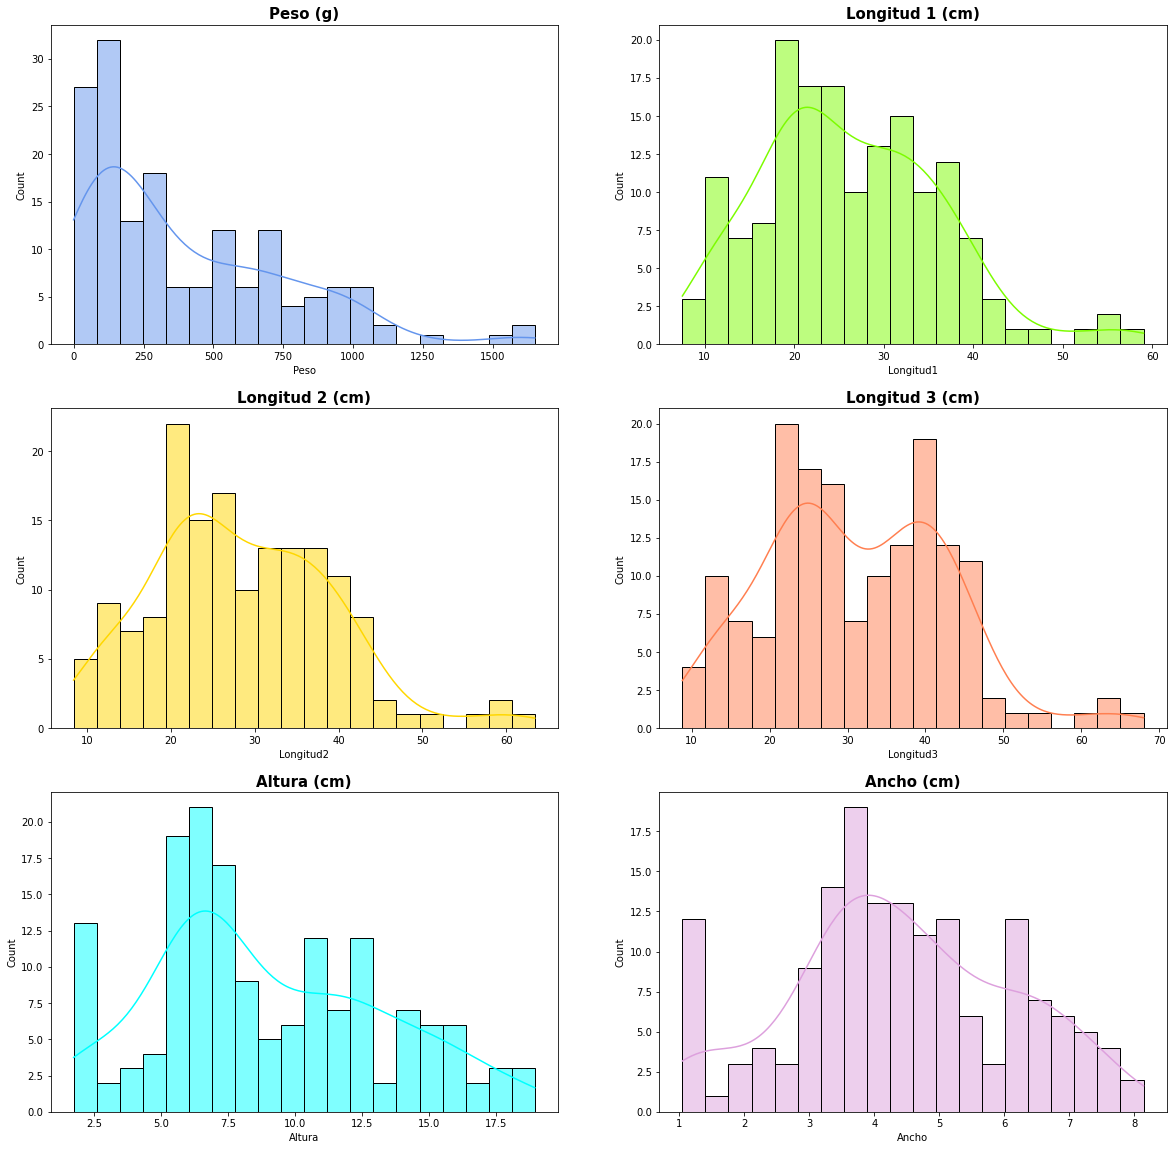

In [6]:
fig, axs =plt.subplots(nrows=3, ncols=2, figsize=(20,20))

# Grafica para el peso
sns.histplot(x="Peso", data=df_peces, ax = axs[0,0], bins= 20, kde=True, color="cornflowerblue")
axs[0,0].set_title('Peso (g)', fontsize = 15, fontweight = "bold")

# Grafica para la longitud 1
sns.histplot(x="Longitud1", data=df_peces, ax = axs[0,1],bins= 20, kde=True,  color="lawngreen")
axs[0,1].set_title('Longitud 1 (cm)', fontsize = 15, fontweight = "bold")

# Grafica para la longitud 2
sns.histplot(x="Longitud2", data=df_peces, ax = axs[1,0],bins= 20,  kde=True, color="gold")
axs[1,0].set_title('Longitud 2 (cm)', fontsize = 15, fontweight = "bold")

# Grafica para la longitud 3
sns.histplot(x="Longitud3", data=df_peces, ax = axs[1,1],bins= 20, kde=True,   color="coral")
axs[1,1].set_title('Longitud 3 (cm)', fontsize = 15, fontweight = "bold")

# Grafica para la altura
sns.histplot(x="Altura", data=df_peces, ax = axs[2,0] ,bins= 20, kde=True,  color="cyan")
axs[2,0].set_title('Altura (cm)', fontsize = 15, fontweight = "bold")

# Grafica para el ancho
sns.histplot(x="Ancho", data=df_peces, ax = axs[2,1], bins= 20, kde=True, color="plum")
axs[2,1].set_title('Ancho (cm)', fontsize = 15, fontweight = "bold")

Parece que ninguna de la distribucion de las variables es normal. En principio, no tiene porque ser un problema para elaborar un modelo, ya que lo que necesitamos es una normalidad en los residuos del mismo

### Eliminar datos nulos

Quiero eliminar los datos nulos para el peso. Para ello, primero voy a buscar que registros tienen un valor de 0 para el peso del pez. 

In [7]:
# Imprimimos los registros con un valor de 0 para el peso
print(df_peces[df_peces['Peso'] == 0])

   Especie  Peso  Longitud1  Longitud2  Longitud3  Altura   Ancho
40   Roach   0.0       19.0       20.5       22.8  6.4752  3.3516


Solamente tenemos un pez con un peso de 0, un rutilo. Quiero conocer la media de peso de esta especie para conocer si es especialmente ligero.

In [8]:
print(df_peces[df_peces['Especie'] == "Roach"]["Peso"].describe())

count     20.000000
mean     152.050000
std       88.828916
min        0.000000
25%      104.250000
50%      147.500000
75%      171.750000
max      390.000000
Name: Peso, dtype: float64


La media para el peso del rutilo (contando con nuestro rutilo de 0 g) es de 152 g. Tengo pocas dudas de que es un fallo en el registro, por lo que procedo a eliminarlo de nuestra base de datos. 

In [9]:
# Eliminar el registro que tiene un peso de 0
print("Cantidad de filas inicial:", len(df_peces))
df_peces = df_peces.drop(df_peces[df_peces['Peso'] == 0].index)
print("Cantidad de filas tras eliminar columnas:", len(df_peces))

Cantidad de filas inicial: 159
Cantidad de filas tras eliminar columnas: 158


### Elaboración del modelo

A la hora de crear un modelo lineal múltiple es interesante conseguir aquel que con la menor cantidad de variables de los mejores resultados. Para conocer cual modelo es es mejor existen dos posibilidades:

**Evaluación aguas arriba ->** Empezamos creando modelos de regresión simple, uno para cada variable explicativa. A continuación elegimos cual da los mejores resultas bien basandonos en el R2, bien basandonos en el p-valor. A continuación, con la mejor variable creamos distintos modelos combinadola con el resto de variables. Nuevamente, evaluamos si mejora el valor de la R2 o el p-valor, y con la mejor combinación probamos una nueva ronda de combinaciones.

**Evaluación aguas abajo ->** Creamos un modelo con todas las variables y a continuación tantos modelos como sea posible retirando una variable. Debemos seguir retirando variables hasta que el modelo deje de mejorar. 

Es importante cuando trabajemos con más de una variable que en lugar de la R2 evaluemos la **R2ajustada**, que añade una penalización a nuestro modelo. Esta penalización se añade, porque debido a la naturaleza del modelo de correlación, su R aumenta siempre que añadas variables.

En esta ocasión voy a empezar con el modelo de aguas abajo y retirar tantas variables como mejore nuestro modelo.
    

## Crear variables

In [10]:
# Generamos las variables con las que queremos trabajar
y = df_peces["Peso"]
X = df_peces[["Longitud1","Longitud2","Longitud3","Altura","Ancho"]]

### Generación del primer modelo

In [11]:
# Entrenamos y ajustamos el modelo
modelo_1 = sm.OLS(endog=y, exog=X)
resultado_1 =modelo_1.fit()

print(resultado_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Peso   R-squared (uncentered):                   0.856
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                              181.6
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                    1.91e-62
Time:                        10:47:52   Log-Likelihood:                         -1064.3
No. Observations:                 158   AIC:                                      2139.
Df Residuals:                     153   BIC:                                      2154.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Nuestro modelo con todas las variables tiene una Rajustada de 0.85, un resultado bastante bueno soportado por un p-valor de 2*e-62. Vamos a probar a generar una segunda ronda de modelos retirando variables.

### Segunda ronda de modelos

In [12]:
# Definimos las nuevas combinaciones de variables retirando 1
X_1 = df_peces[["Longitud2","Longitud3","Altura","Ancho"]]
X_2 = df_peces[["Longitud1","Longitud3","Altura","Ancho"]]
X_3 = df_peces[["Longitud1","Longitud2","Altura","Ancho"]]
X_4 = df_peces[["Longitud1","Longitud2","Longitud3","Ancho"]]
X_5 = df_peces[["Longitud1","Longitud2","Longitud3","Altura"]]

# Entrenamos y ajustamos los modelos
modelo_2_1 = sm.OLS(endog=y, exog=X_1)
resultado_2_1 =modelo_2_1.fit()

modelo_2_2 = sm.OLS(endog=y, exog=X_2)
resultado_2_2 =modelo_2_2.fit()

modelo_2_3 = sm.OLS(endog=y, exog=X_3)
resultado_2_3 =modelo_2_3.fit()

modelo_2_4= sm.OLS(endog=y, exog=X_4)
resultado_2_4=modelo_2_4.fit()

modelo_2_5 = sm.OLS(endog=y, exog=X_5)
resultado_2_5 =modelo_2_5.fit()

# Observamos los nuevos valores de nuestras R2 ajustadas
print("R ajustada quintado la variable Longitud 1:",resultado_2_1.rsquared_adj )
print("R ajustada quintado la variable Longitud 2:",resultado_2_2.rsquared_adj )
print("R ajustada quintado la variable Longitud 3:",resultado_2_3.rsquared_adj )
print("R ajustada quintado la variable Altura:",resultado_2_4.rsquared_adj )
print("R ajustada quintado la variable Ancho:",resultado_2_5.rsquared_adj )

R ajustada quintado la variable Longitud 1: 0.8428347092821578
R ajustada quintado la variable Longitud 2: 0.8502659232188494
R ajustada quintado la variable Longitud 3: 0.8444815792194355
R ajustada quintado la variable Altura: 0.8381292084180594
R ajustada quintado la variable Ancho: 0.8500070358550603


Nuestro modelo no mejora retirando ninguna de las variables, por lo que optamos por quedarnos con el modelo más conservativo. 

## MULTICOLINEALIDAD

Un problema a evitar cuando generamos los modelos de regresión multiple es la colinealidad. Es decir, debemos evitar utilizar variables que se explique altamente entre sí. Para ello podemos crear un correlograma con el que evaluar como se correlacionan nuestras distintas variables.

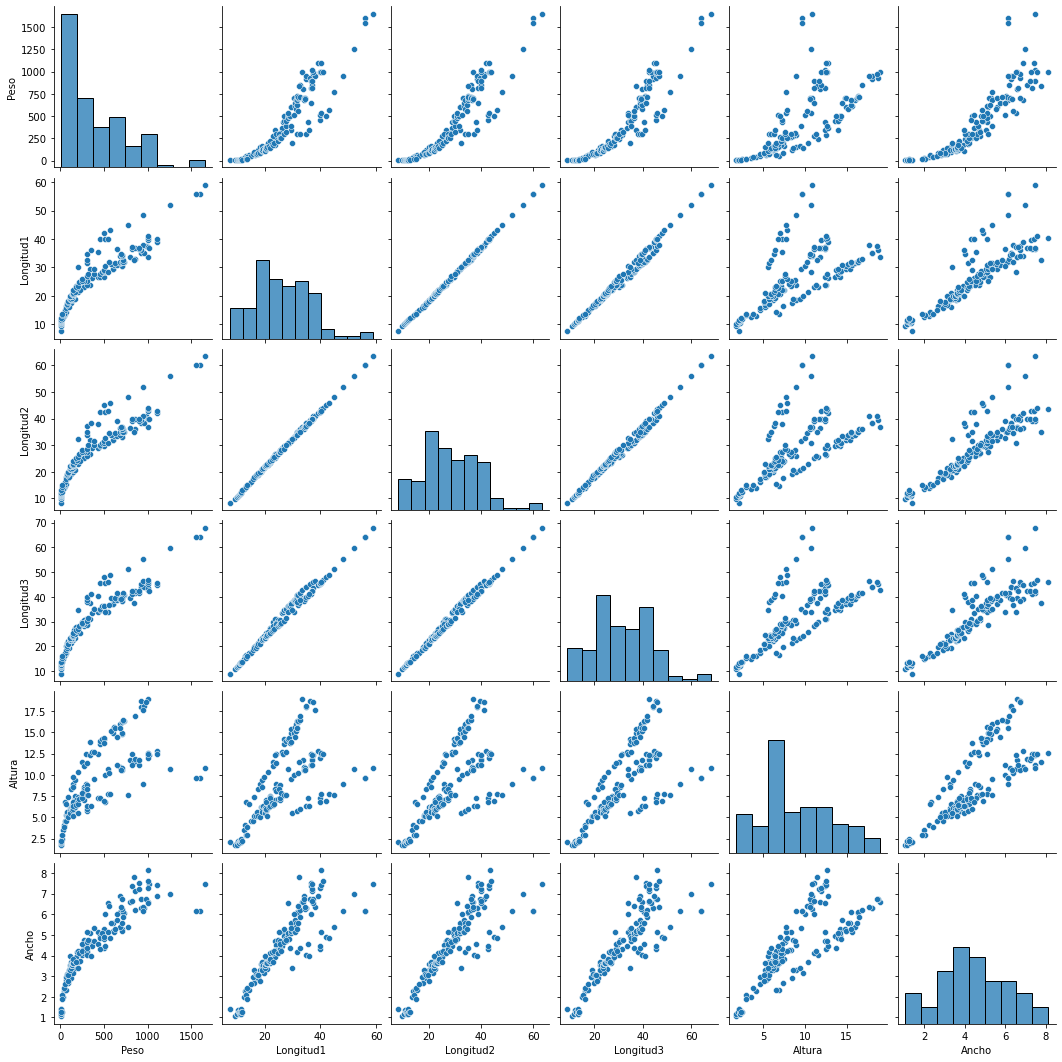

In [13]:
#Dibujamos el correlograma
sns.pairplot(df_peces)
plt.show()

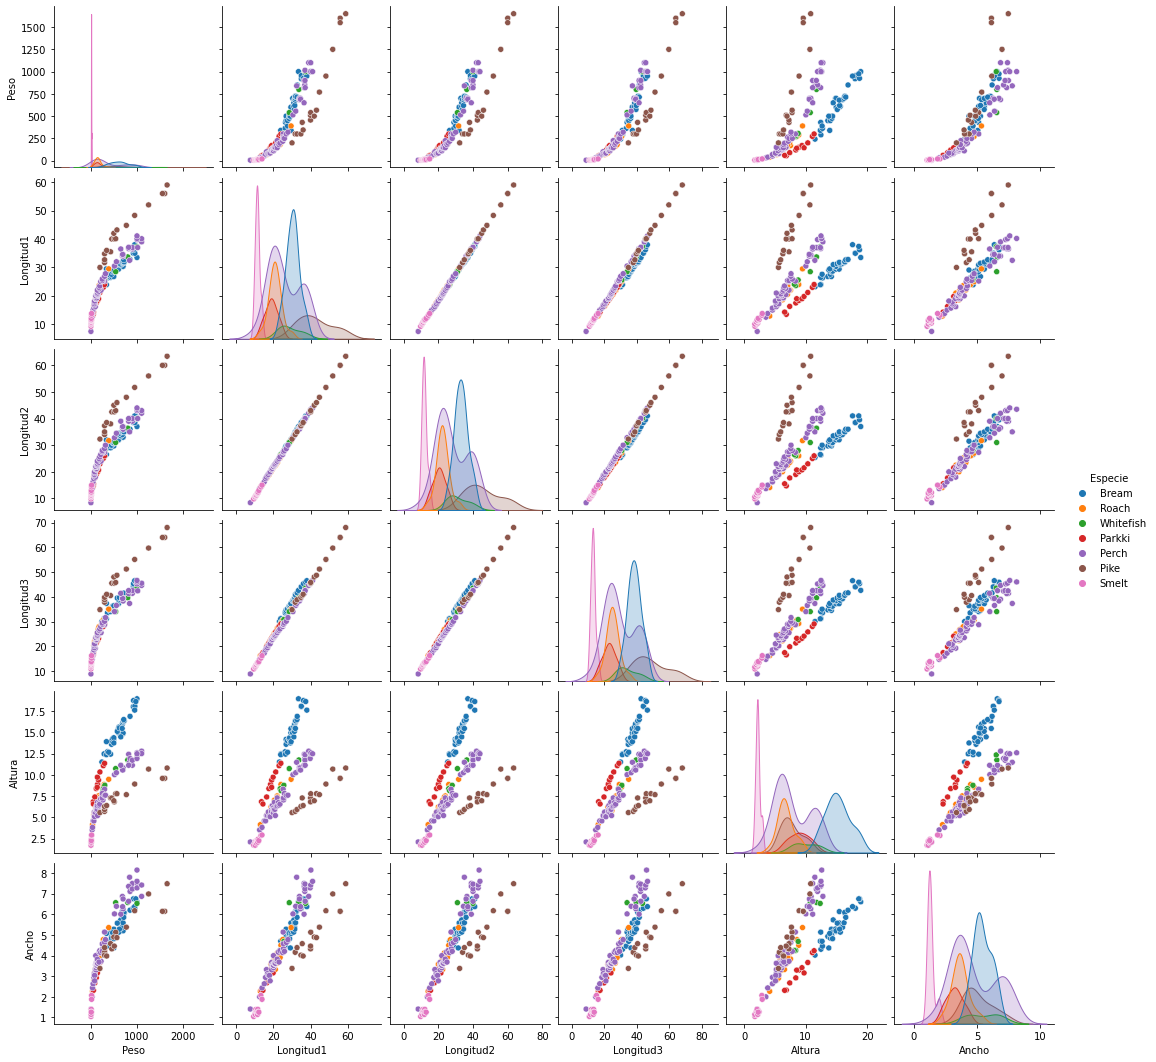

In [14]:
# También podemos dibujar un correlograma clasificando los puntos por especies.
sns.pairplot(df_peces, hue="Especie")
plt.show()

Las tres longitudes se explican bastante bien entre sí, incluso sin importar la especie con la que se está trabajando. Por lo tanto, es conveniente que nos quedemos solamente con una de ellas, en este caso Voy a escoger la que tenga un menor p-valor en el modelo que hemos hecho previamente.

In [15]:
print(resultado_1.pvalues)
# En este caso el menor p-valor es el de la Longitud 1

Longitud1    0.002442
Longitud2    0.180130
Longitud3    0.005912
Altura       0.000216
Ancho        0.151210
dtype: float64


### Nuevo modelo

In [16]:
# Generamos las variable
X_longitud1 = df_peces[["Longitud1","Altura","Ancho"]]

# Generamos el modelo 
modelo_longitud1 = sm.OLS(endog=y, exog=X_longitud1)
resultado_longitud1 =modelo_longitud1.fit()

print(resultado_longitud1.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Peso   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                              272.6
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                    1.39e-61
Time:                        10:48:07   Log-Likelihood:                         -1072.1
No. Observations:                 158   AIC:                                      2150.
Df Residuals:                     155   BIC:                                      2159.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

El nuevo modelo no empeora sustancialmente y sigue teniendo un fuerte apoyo del p-valor